# 🏦 Bank Customer Churn Analysis



## 🎯 Objective
Analyze customer account data to uncover patterns in churn behavior, demographic trends and Geographic Behavior                                       to Build insights that support future strategies.


## 🔍 Key Questions 

#### 1️⃣ Churn Behavior Analysis
**Question:**  
What attributes are more common among churners than non-churners?


#### 2️⃣ Demographic Profiling
**Question:**  
What do the overall demographics of the bank's customers look like?


#### 3️⃣ Geographic Behavior Differences
**Question:**  
Is there a difference between German, French, and Spanish customers in terms of account behavior?




# 🧹Importing and Cleaning Data

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

bank = pd.read_csv(r'C:\Users\ramma\Downloads\Bank+Customer+Churn  - python project\Bank_Churn.csv')

bank['Exited'] = bank['Exited'].replace({0: 'Stayed', 1: 'Churned'})

bank

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Churned
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Stayed
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Churned
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Stayed
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,Stayed
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,Stayed
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,Churned
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,Churned


In [2]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


In [3]:
#  Missing & Null Values

bank.isnull().sum()
bank[bank == ''].count()  # For empty strings in object columns


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# Duplicate Records
bank.duplicated().sum()
bank['CustomerId'].duplicated().sum()



np.int64(0)

In [5]:
# Outlier Detection

bank[['CreditScore', 'Balance', 'Age', 'EstimatedSalary']].describe()


,CreditScore,Balance,Age,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,38.921800,100090.239881
std,96.653299,62397.405202,10.487806,57510.492818
min,350.000000,0.000000,18.000000,11.580000
25%,584.000000,0.000000,32.000000,51002.110000
50%,652.000000,97198.540000,37.000000,100193.915000
75%,718.000000,127644.240000,44.000000,149388.247500
max,850.000000,250898.090000,92.000000,199992.480000


## 1️⃣ Churn Behavior Analysis
Question:
What attributes are more common among churners than non-churners?


In [6]:
bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Churned
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Stayed
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Churned
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Stayed
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Stayed


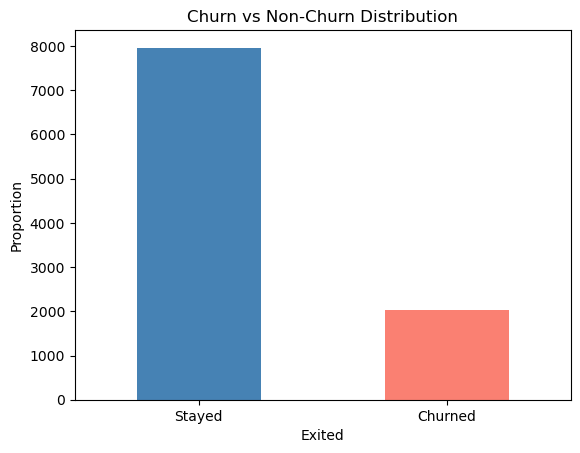

In [7]:
# Churn Distribution 

bank['Exited'].value_counts().plot(kind='bar', color=['steelblue', 'salmon'], rot = 0)
plt.title('Churn vs Non-Churn Distribution')
plt.ylabel('Proportion');



### 📈 Attribute Comparison by Churn Status 


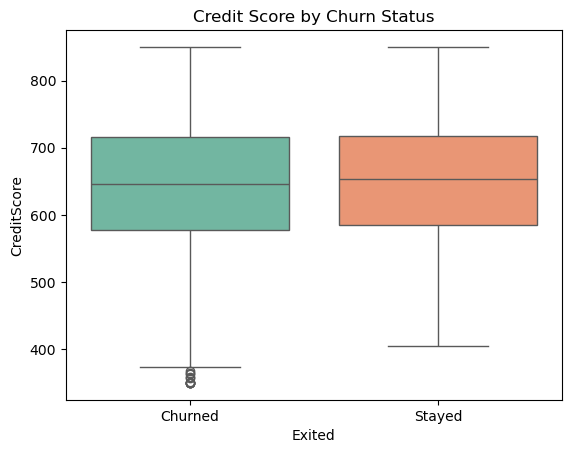

In [8]:
# credit Score 

sns.boxplot(x='Exited', y='CreditScore', data = bank, hue ='Exited', palette = 'Set2')
plt.title('Credit Score by Churn Status');



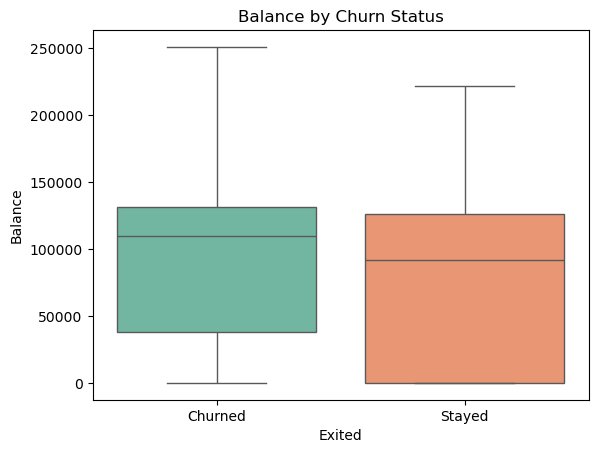

In [9]:
# Balance 

sns.boxplot(x='Exited', y='Balance', data = bank, hue='Exited', palette='Set2')
plt.title('Balance by Churn Status');




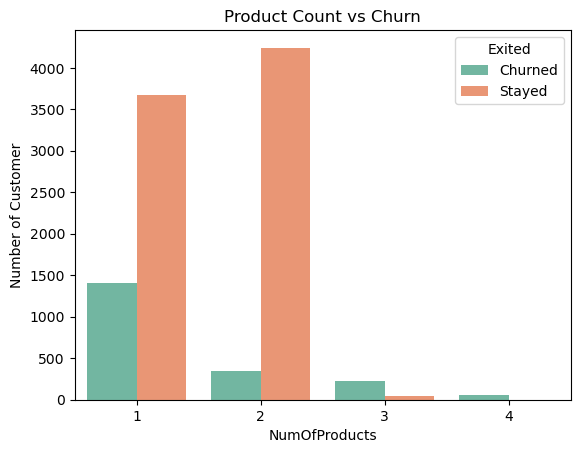

In [10]:
# number of Products 

sns.countplot(x='NumOfProducts', hue='Exited', data = bank, palette='Set2')
plt.title('Product Count vs Churn')
plt.ylabel('Number of Customer');



### 🔍 Binary Attribute Comparison 

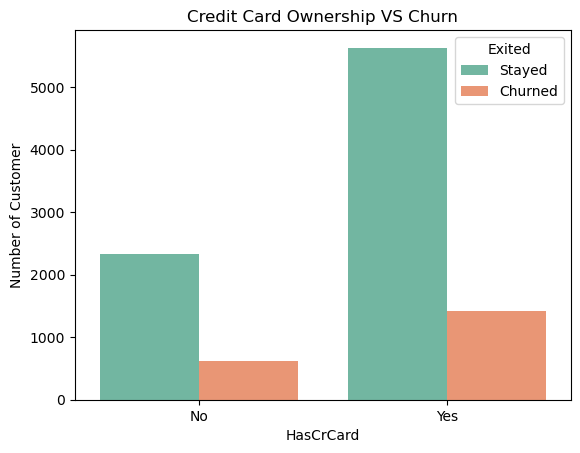

In [11]:
# has Credit Card 

sns.countplot(x='HasCrCard', hue='Exited', data = bank, palette = 'Set2')
plt.title('Credit Card Ownership VS Churn')
plt.xticks([0,1], ['No', 'Yes'])
plt.ylabel('Number of Customer');


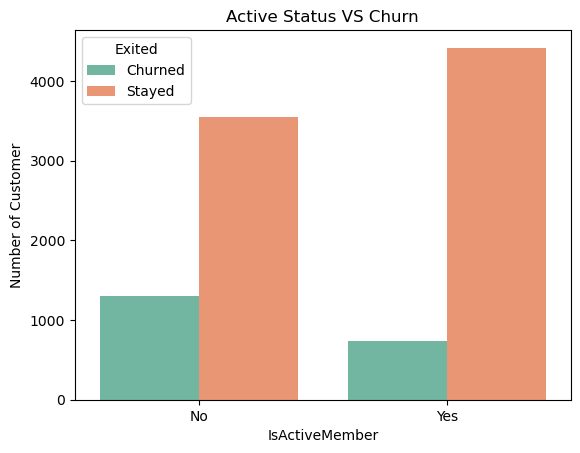

In [12]:
# is Active Member 

sns.countplot(x='IsActiveMember', hue='Exited', data=bank, palette='Set2')
plt.title('Active Status VS Churn')
plt.xticks([0,1], ['No', 'Yes'])

plt.ylabel('Number of Customer');


In [13]:
bank.groupby('Exited')[['CreditScore', 'Balance', 'NumOfProducts']].mean().round(2)



,CreditScore,Balance,NumOfProducts
Exited,,,
Churned,645.35,91108.54,1.48
Stayed,651.85,72745.30,1.54


# 2️⃣ Demographic Profiling
**Question:**  
What do the overall demographics of the bank's customers look like?


In [14]:
bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Churned
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Stayed
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Churned
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Stayed
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Stayed


In [15]:
bank[['Age', 'Tenure', 'EstimatedSalary']].describe()

,Age,Tenure,EstimatedSalary
count,10000.000000,10000.000000,10000.000000
mean,38.921800,5.012800,100090.239881
std,10.487806,2.892174,57510.492818
min,18.000000,0.000000,11.580000
25%,32.000000,3.000000,51002.110000
50%,37.000000,5.000000,100193.915000
75%,44.000000,7.000000,149388.247500
max,92.000000,10.000000,199992.480000


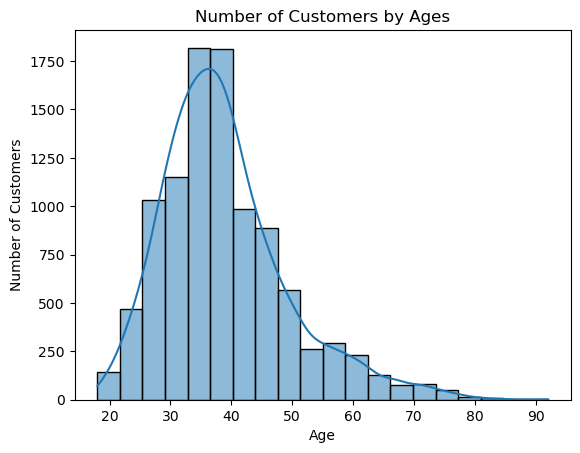

In [16]:
# visual the Age column 

sns.histplot(bank['Age'], bins=20, kde=True)
plt.title('Number of Customers by Ages')
plt.ylabel('Number of Customers');

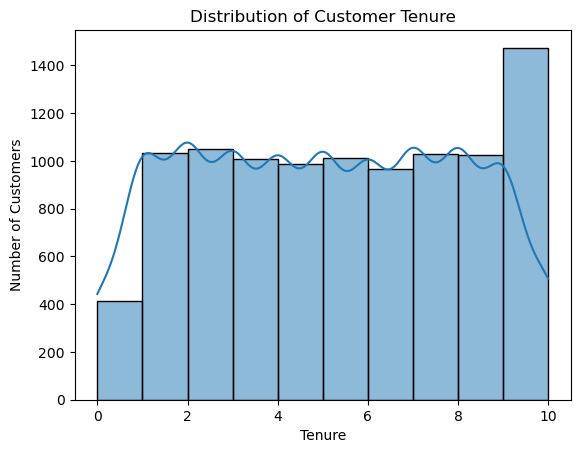

In [17]:
# visual the Tenure column 

sns.histplot(bank['Tenure'], bins=10, kde=True)
plt.title('Distribution of Customer Tenure')
plt.ylabel('Number of Customers');


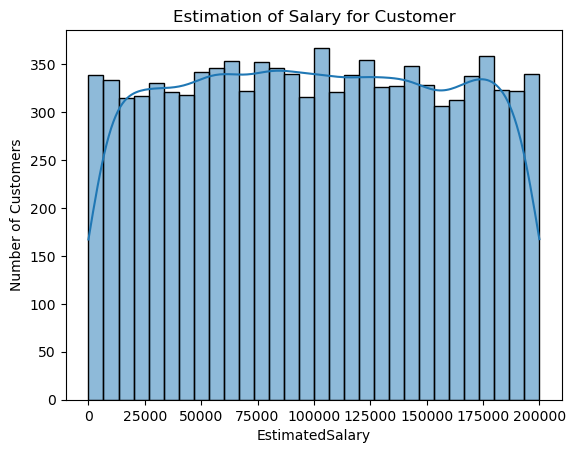

In [18]:
# visual the EstimatedSalary column 

sns.histplot(bank['EstimatedSalary'], bins=30, kde=True)
plt.title('Estimation of Salary for Customer')
plt.ylabel('Number of Customers');

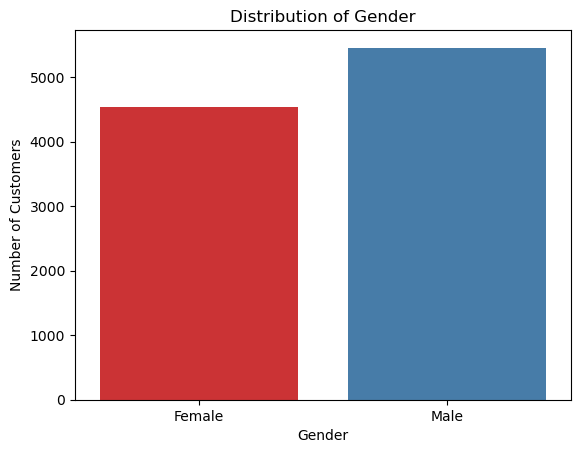

In [19]:
# look at the gender in the bank 

sns.countplot(x='Gender', data=bank, hue='Gender', palette='Set1')
plt.title('Distribution of Gender');
plt.ylabel('Number of Customers');

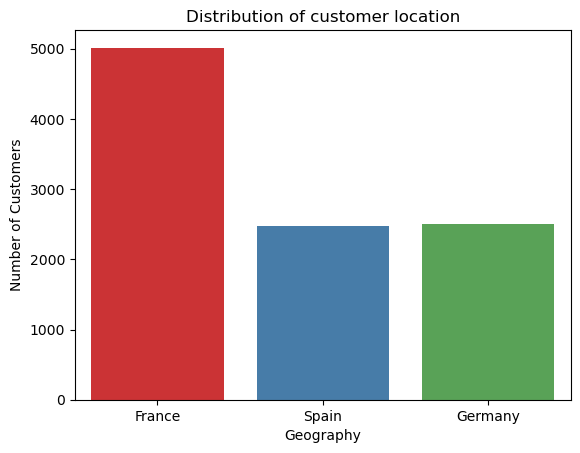

In [20]:
# looke at the location of customers

sns.countplot(x='Geography', data=bank, hue='Geography', palette='Set1' )
plt.title('Distribution of customer location')
plt.ylabel('Number of Customers');

# 3️⃣ Geographic Behavior Differences
Question:
Is there a difference between German, French, and Spanish customers in terms of account behavior?


In [22]:
bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Churned
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Stayed
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Churned
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Stayed
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Stayed


In [23]:
# Compare account behavior across Germany, France, and Spain.

bank.groupby('Geography')[['Balance', 'Tenure', 'NumOfProducts']].mean().round(2)


,Balance,Tenure,NumOfProducts
Geography,,,
France,62092.64,5.00,1.53
Germany,119730.12,5.01,1.52
Spain,61818.15,5.03,1.54


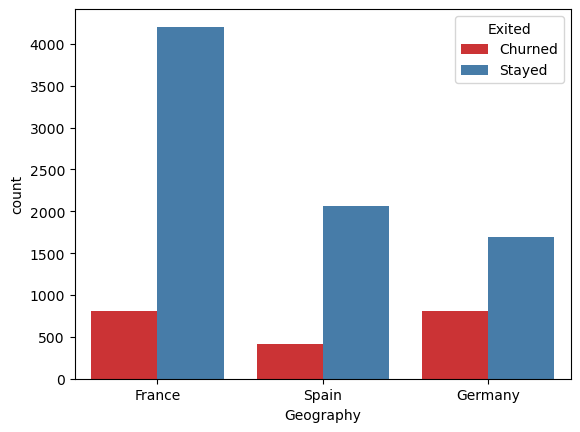

In [24]:
# visualize countries to understand Churned / stayed 

sns.countplot(x='Geography', hue='Exited', data=bank, palette='Set1');